In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


In [2]:
train=pd.read_csv("train_tdata.csv")
test=pd.read_csv("test_tdata.csv")

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [5]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
train.shape

(891, 12)

In [8]:
train.size

10692

In [9]:
test.shape

(418, 11)

In [10]:
test.size

4598

<AxesSubplot:xlabel='Survived', ylabel='count'>

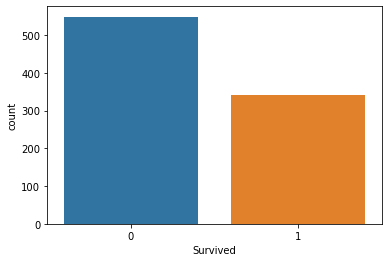

In [11]:
sns.countplot(train["Survived"])

<AxesSubplot:xlabel='SibSp', ylabel='count'>

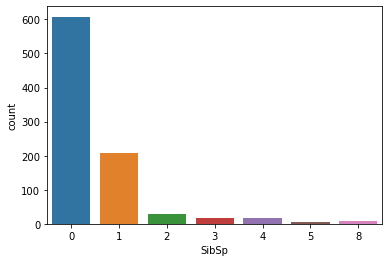

In [12]:
sns.countplot(train["SibSp"])

<AxesSubplot:xlabel='Parch', ylabel='count'>

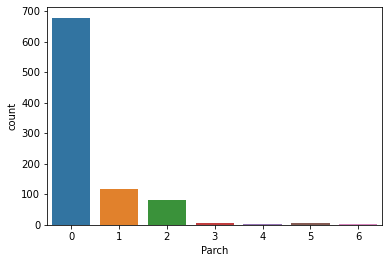

In [13]:
sns.countplot(train["Parch"])

<AxesSubplot:xlabel='Embarked', ylabel='count'>

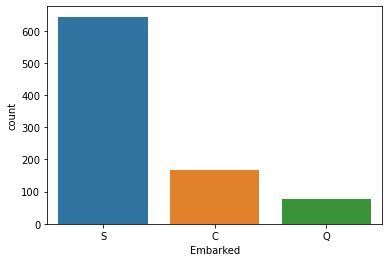

In [14]:
sns.countplot(train["Embarked"])


<AxesSubplot:xlabel='Age', ylabel='Density'>

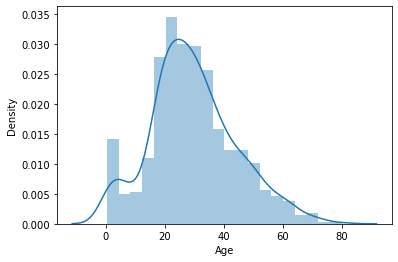

In [15]:
sns.distplot(train["Age"])

<AxesSubplot:xlabel='Fare', ylabel='Density'>

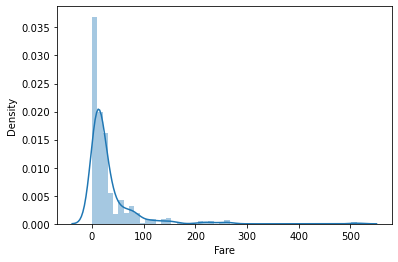

In [16]:
sns.distplot(train["Fare"])

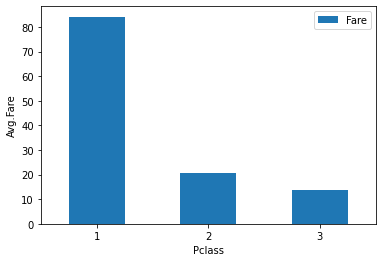

In [17]:
class_fare=train.pivot_table(index="Pclass",values="Fare")
class_fare.plot(kind="bar")
plt.xlabel("Pclass")
plt.ylabel("Avg.Fare")
plt.xticks(rotation=0)
plt.show()

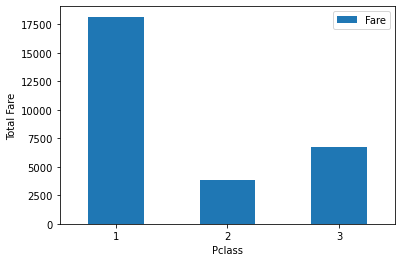

In [18]:
class_fare=train.pivot_table(index="Pclass",values="Fare",aggfunc=np.sum)
class_fare.plot(kind="bar")
plt.xlabel("Pclass")
plt.ylabel("Total Fare")
plt.xticks(rotation=0)
plt.show()

In [19]:
# Data Processing

train_len=len(train)

# Combine two dataframes

df=pd.concat([train,test],axis=0)
df=df.reset_index(drop=True)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [20]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
1308,1309,NaN,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [21]:
df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [22]:
# Drop the column

df=df.drop(columns=["Cabin"],axis=1)

In [23]:
df["Age"].mean()

29.881137667304014

In [24]:
# Filling missing values using mean of numerical col

df["Age"]=df["Age"].fillna(df["Age"].mean())
df["Fare"]=df["Fare"].fillna(df["Fare"].mean())

In [25]:
df["Embarked"].mode()[0]

'S'

In [26]:
# Filling missing values using mode of categorical col

df["Embarked"]=df["Embarked"].fillna(df["Embarked"].mode()[0])


<AxesSubplot:xlabel='Fare', ylabel='Density'>

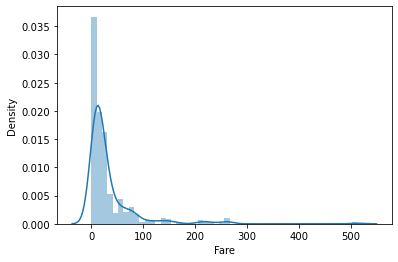

In [27]:
sns.distplot(df["Fare"])

In [28]:
df["Fare"]=np.log(df["Fare"]+1)

<AxesSubplot:xlabel='Fare', ylabel='Density'>

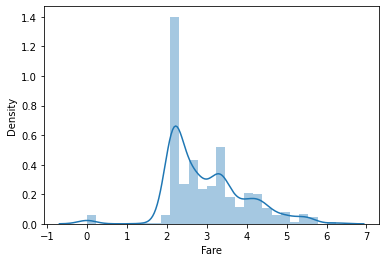

In [29]:
sns.distplot(df["Fare"])

<AxesSubplot:>

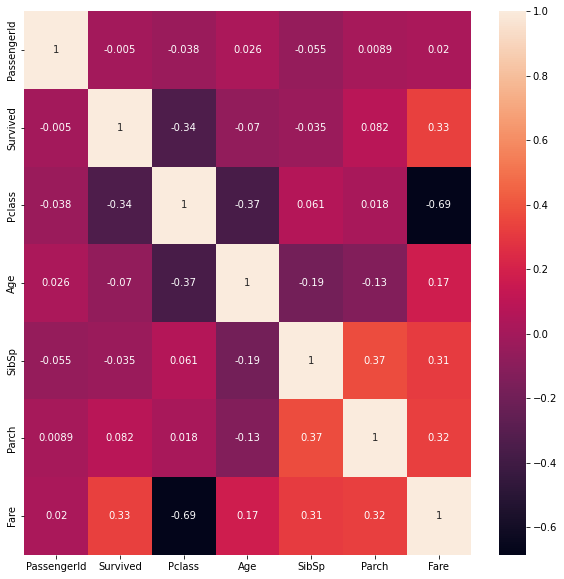

In [30]:
# Correlation matrix

corr=df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True)

In [31]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,2.110213,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,4.280593,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,2.188856,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,3.990834,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,2.202765,S


In [32]:
# Drop unneccesary column

df=df.drop(columns=["Name","Ticket"],axis=1)
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0.0,3,male,22.0,1,0,2.110213,S
1,2,1.0,1,female,38.0,1,0,4.280593,C
2,3,1.0,3,female,26.0,0,0,2.188856,S
3,4,1.0,1,female,35.0,1,0,3.990834,S
4,5,0.0,3,male,35.0,0,0,2.202765,S


In [33]:
# Label encoding

from sklearn.preprocessing import LabelEncoder
cols=["Sex","Embarked"]
le=LabelEncoder()
for col in cols:
    df[col]=le.fit_transform(df[col])
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0.0,3,1,22.0,1,0,2.110213,2
1,2,1.0,1,0,38.0,1,0,4.280593,0
2,3,1.0,3,0,26.0,0,0,2.188856,2
3,4,1.0,1,0,35.0,1,0,3.990834,2
4,5,0.0,3,1,35.0,0,0,2.202765,2


In [34]:
train=df.iloc[:train_len,:]
test=df.iloc[:train_len,:]

In [35]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0.0,3,1,22.0,1,0,2.110213,2
1,2,1.0,1,0,38.0,1,0,4.280593,0
2,3,1.0,3,0,26.0,0,0,2.188856,2
3,4,1.0,1,0,35.0,1,0,3.990834,2
4,5,0.0,3,1,35.0,0,0,2.202765,2


In [36]:
test.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0.0,3,1,22.0,1,0,2.110213,2
1,2,1.0,1,0,38.0,1,0,4.280593,0
2,3,1.0,3,0,26.0,0,0,2.188856,2
3,4,1.0,1,0,35.0,1,0,3.990834,2
4,5,0.0,3,1,35.0,0,0,2.202765,2


In [37]:
# Split input

X=train.drop(columns=["PassengerId","Survived"],axis=1)
y=train["Survived"]

In [38]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,2.110213,2
1,1,0,38.0,1,0,4.280593,0
2,3,0,26.0,0,0,2.188856,2
3,1,0,35.0,1,0,3.990834,2
4,3,1,35.0,0,0,2.202765,2


In [39]:
from sklearn.model_selection import train_test_split,cross_val_score

#Classify column

def classify(model):
    x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)
    model.fit(x_train,y_train)
    print("Accuracy:",model.score(x_test,y_test))
    score=cross_val_score(model,X,y,cv=5)
    print("Cv score:",np.mean(score))

In [40]:
# Model Evaluation

# Logistic Regression

from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
classify(model)

Accuracy: 0.8071748878923767
Cv score: 0.7833971502102819


In [41]:
# DecisionTree

from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
classify(model)

Accuracy: 0.7488789237668162
Cv score: 0.7699704977716403


In [42]:
# Support Vector Machine

from sklearn.svm import SVC
model=SVC()
classify(model)

Accuracy: 0.6188340807174888
Cv score: 0.6835289686774214
